# Laboratorio 03

1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
m = 100

data = {
    'Y': np.arange(0,101,1),
    'X_1': np.arange(0,101,1)
}
df = pd.DataFrame(data)

2. Crear una función para calcular la función de coste.

In [3]:
def cost_function(theta_1, X, Y, theta_0=0):
    m = len(Y)
    J = (1 / (2 * m)) * np.sum((theta_0 + theta_1 * X - Y) ** 2)
    return J

3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

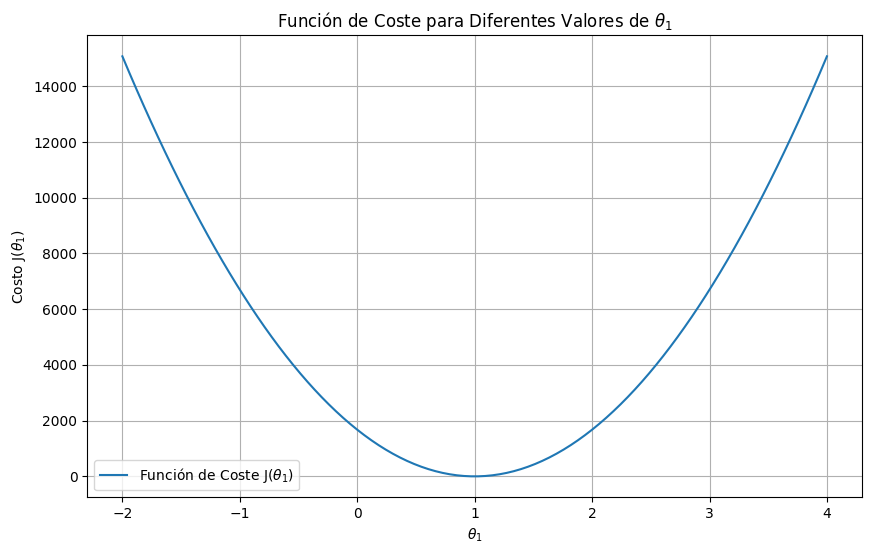

In [4]:
X = df['X_1'].values
Y = df['Y'].values

theta_1_values = np.linspace(-2, 4, 100)
cost_values = [cost_function(theta_1, X, Y) for theta_1 in theta_1_values]

plt.figure(figsize=(10, 6))
plt.plot(theta_1_values, cost_values, label='Función de Coste J($\\theta_1$)')
plt.xlabel('$\\theta_1$')
plt.ylabel('Costo J($\\theta_1$)')
plt.title('Función de Coste para Diferentes Valores de $\\theta_1$')
plt.legend()
plt.grid(True)
plt.show()

Se usa `np.argmin` para encontrar el índice del valor mínimo de los valores de costo.

Valor mínimo de la función de coste: 1.5381 con θ1 = 0.9697


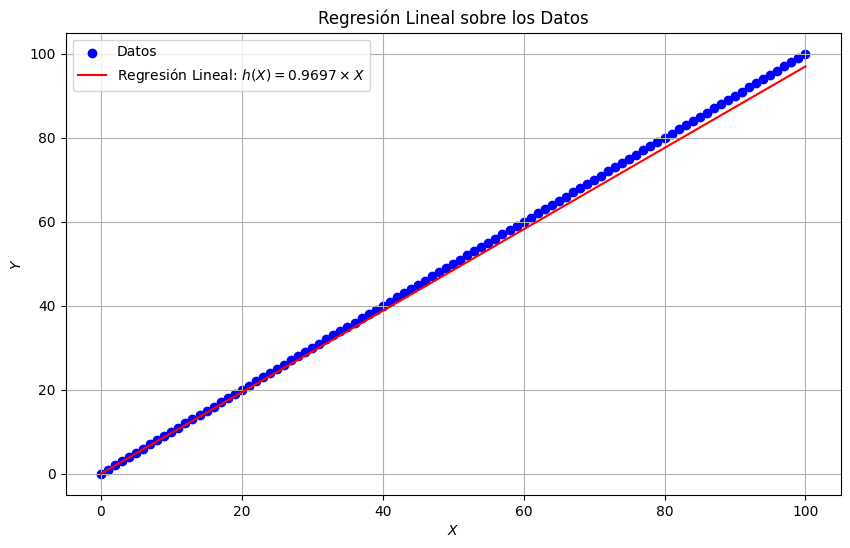

In [5]:
min_cost_index = np.argmin(cost_values)
optimal_theta_1 = theta_1_values[min_cost_index]
min_cost = cost_values[min_cost_index]
print(f"Valor mínimo de la función de coste: {min_cost:.4f} con θ1 = {optimal_theta_1:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Datos')
plt.plot(X, optimal_theta_1 * X, color='red', label=f'Regresión Lineal: $h(X) = {optimal_theta_1:.4f} \\times X$')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Regresión Lineal sobre los Datos')
plt.legend()
plt.grid(True)
plt.show()

4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```

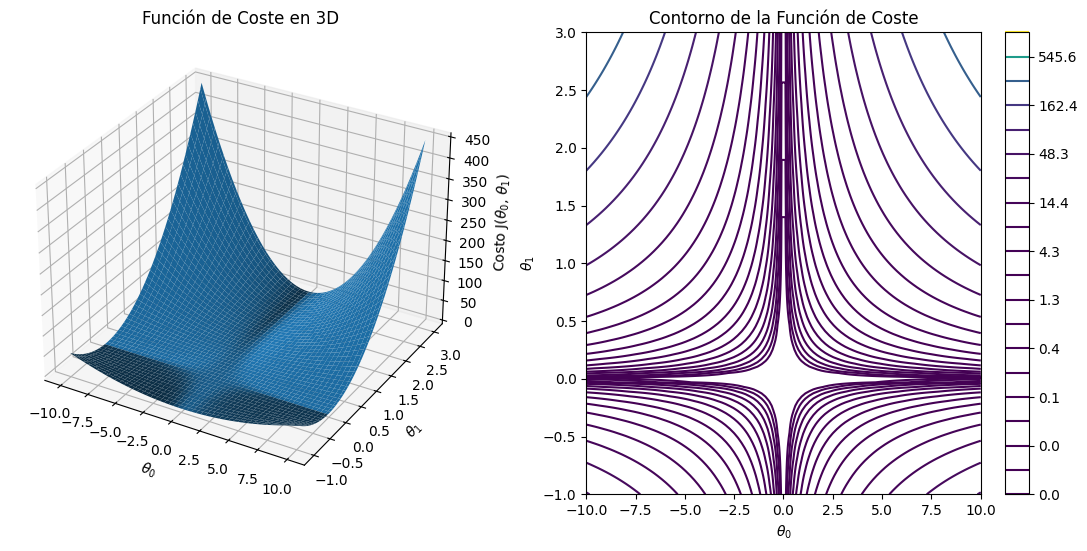

In [6]:
# Crear una malla de valores para theta_0 y theta_1
theta_0_vals = np.linspace(-10, 10, 100)
theta_1_vals = np.linspace(-1, 3, 100)
t0, t1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Calcular la función de coste para cada combinación de theta_0 y theta_1
J_vals = np.zeros(t0.shape)
for i in range(t0.shape[0]):
    for j in range(t0.shape[1]):
        J_vals[i, j] = cost_function(t0[i, j], t1[i, j], X, Y)

# Graficar la función de coste en 3D y con contornos
fig = plt.figure(figsize=(14, 6))

# Gráfico de superficie 3D
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(t0, t1, J_vals)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("Costo J($\\theta_0$, $\\theta_1$)")
ax.set_title("Función de Coste en 3D")

# Gráfico de contornos 2D
ax2 = fig.add_subplot(122)
contour = ax2.contour(t0, t1, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
ax2.set_xlabel("$\\theta_0$")
ax2.set_ylabel("$\\theta_1$")
ax2.set_title("Contorno de la Función de Coste")
plt.colorbar(contour, ax=ax2)

plt.show()

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

Solución:

### Caso 1D (con una sola característica $X$)
Supongamos que el modelo lineal en 1D tiene la forma

$$
h(X)=\theta_0+\theta_1X
$$

Sustituyendo $h$ dentro de la función de coste, quedaría como:

$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left( \theta_0 + \theta_1 X^{(i)} - y^{(i)} \right)^2
$$

### Caso 2D (con dos características $X_1$ y $X_2$)

Para el caso de dos características $X_1$ y $X_2$, el modelo lineal toma la forma:

$$
h(X)=\theta_0+\theta_1 X_1+\theta_2 X_2
$$

La función de coste, al sustituir $h(X)$, queda entonces como:

$$
J(\theta_0, \theta_1, \theta_2) = \frac{1}{2m} \sum_{i=1}^m \left( \theta_0 + \theta_1 X_1^{(i)} + \theta_2 X_2^{(i)} - y^{(i)} \right)^2
$$

# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

Solución:

Para esto primero se define la función `f(x)` con su derivada:

In [7]:
def f(x):
    return (x - 4) ** 2

def f_prime(x):
    return 2 * (x - 4)

Ahora se define la función de gradiente descendiente que recibe como entrada la función definida con su derivada:

In [8]:
# Algoritmo de gradiente descendente
def gradient_descent(f, f_prime, alpha, initial_x, epsilon=1e-4, max_iterations=1000):
    x = initial_x
    history = [(x, f(x))]
    for i in range(max_iterations):
        gradient = f_prime(x)
        x_new = x - alpha * gradient
        history.append((x_new, f(x_new)))
        
        # Revisar el criterio de parada
        if abs(f(x_new) - f(x)) < epsilon:
            print(f"Convergencia alcanzada en {i+1} iteraciones con α = {alpha}")
            break
        x = x_new
    return x, history

Y por último se ejecuta el algoritmo:

In [9]:
initial_x = np.random.rand() * 10  # Valor inicial aleatorio en el rango [0, 10]
alphas = [0.01, 0.1, 0.5]

for alpha in alphas:
    minimum, history = gradient_descent(f, f_prime, alpha, initial_x)
    print(f"Valor mínimo de f(x) encontrado: f({minimum}) = {f(minimum)} con α = {alpha}")

    print("Últimas iteraciones (x, f(x)):")
    for x, fx in history[-10:]:  # Mostrar solo las últimas 10 iteraciones
        print(f"x = {x:.5f}, f(x) = {fx:.5f}")
    print("\n")

Convergencia alcanzada en 193 iteraciones con α = 0.01
Valor mínimo de f(x) encontrado: f(3.9503262203089395) = 0.002467484388796011 con α = 0.01
Últimas iteraciones (x, f(x)):
x = 3.94161, f(x) = 0.00341
x = 3.94278, f(x) = 0.00327
x = 3.94392, f(x) = 0.00314
x = 3.94505, f(x) = 0.00302
x = 3.94615, f(x) = 0.00290
x = 3.94722, f(x) = 0.00279
x = 3.94828, f(x) = 0.00268
x = 3.94931, f(x) = 0.00257
x = 3.95033, f(x) = 0.00247
x = 3.95132, f(x) = 0.00237


Convergencia alcanzada en 24 iteraciones con α = 0.1
Valor mínimo de f(x) encontrado: f(3.9858162726387625) = 0.00020117812185791784 con α = 0.1
Últimas iteraciones (x, f(x)):
x = 3.91546, f(x) = 0.00715
x = 3.93237, f(x) = 0.00457
x = 3.94589, f(x) = 0.00293
x = 3.95671, f(x) = 0.00187
x = 3.96537, f(x) = 0.00120
x = 3.97230, f(x) = 0.00077
x = 3.97784, f(x) = 0.00049
x = 3.98227, f(x) = 0.00031
x = 3.98582, f(x) = 0.00020
x = 3.98865, f(x) = 0.00013


Convergencia alcanzada en 2 iteraciones con α = 0.5
Valor mínimo de f(x) encontrado

7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:

\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.


Solución:

Primero se grafica la función en 3D con su respectivo mapa de contorno:

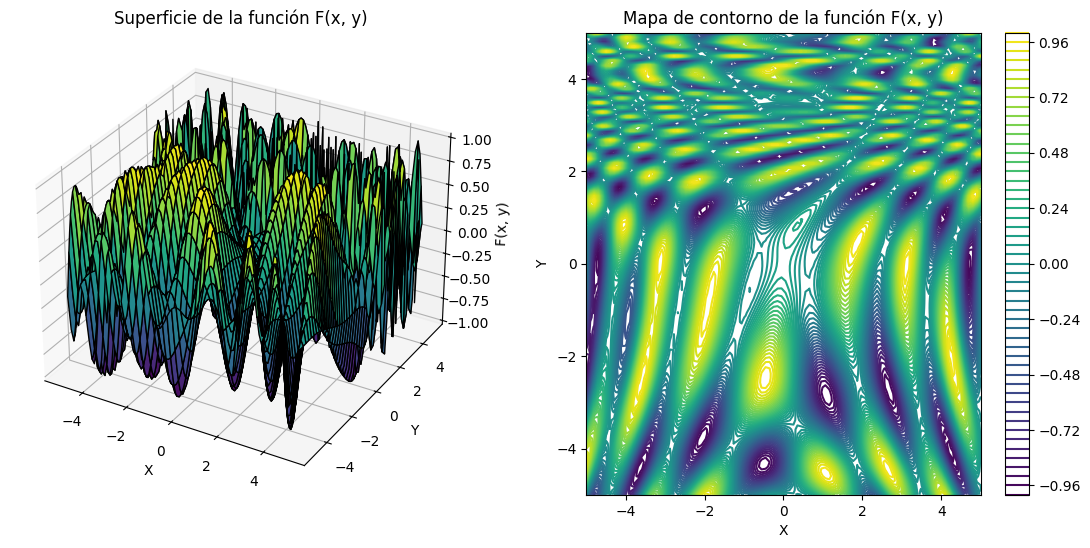

In [10]:
# Definir la función
def F(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

# Crear la malla para los gráficos
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = F(X, Y)

# Graficar en 3D
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(x, y)')
ax.set_title('Superficie de la función F(x, y)')

# Graficar el mapa de contorno
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Mapa de contorno de la función F(x, y)')
plt.colorbar(contour, ax=ax2)

plt.show()

Ahora se implementa el método de gradiente descendiente, en donde se vuelve necesario hallar las derivadas parciales de $F(x,y)$. Debido a la complejidad de la función se usa un método numérico (aproximación de derivadas) para el cálculo de los gradientes.

Primero se definen estas derivadas:

In [11]:
def gradient_F(x, y, h=1e-5):
    dF_dx = (F(x + h, y) - F(x, y)) / h
    dF_dy = (F(x, y + h) - F(x, y)) / h
    return dF_dx, dF_dy

Después se define la función de gradiente descendiente para encontrar el mínimo que en este caso realiza el descenso a través de ambas variables:

In [12]:
def gradient_descent_F(alpha, initial_x, initial_y, epsilon=1e-4, max_iterations=1000):
    x, y = initial_x, initial_y
    history = [(x, y, F(x, y))]
    for i in range(max_iterations):
        grad_x, grad_y = gradient_F(x, y)
        x_new = x - alpha * grad_x
        y_new = y - alpha * grad_y
        history.append((x_new, y_new, F(x_new, y_new)))

        if abs(F(x_new, y_new) - F(x, y)) < epsilon:
            print(f"Convergencia alcanzada en {i+1} iteraciones con α = {alpha}")
            break
        x, y = x_new, y_new
    return (x, y), F(x, y), history

Y por último se ejecuta la función con todo el algoritmo:

In [13]:
# Parámetros iniciales y valor de tasa de aprendizaje para probar
initial_x, initial_y = (1.5, -3.5)
alpha = 0.01  # Tasa de aprendizaje

# Ejecutar el algoritmo
minimum_point, minimum_value, history = gradient_descent_F(alpha, initial_x, initial_y)
print(f"Valor mínimo de F(x, y) encontrado: F({minimum_point[0]}, {minimum_point[1]}) = {minimum_value}")

Convergencia alcanzada en 167 iteraciones con α = 0.01
Valor mínimo de F(x, y) encontrado: F(1.124961220433983, -2.9141642579479345) = -0.9966737508018662


También se hace una gráfica en el contorno que muestra el camino de convergencia:

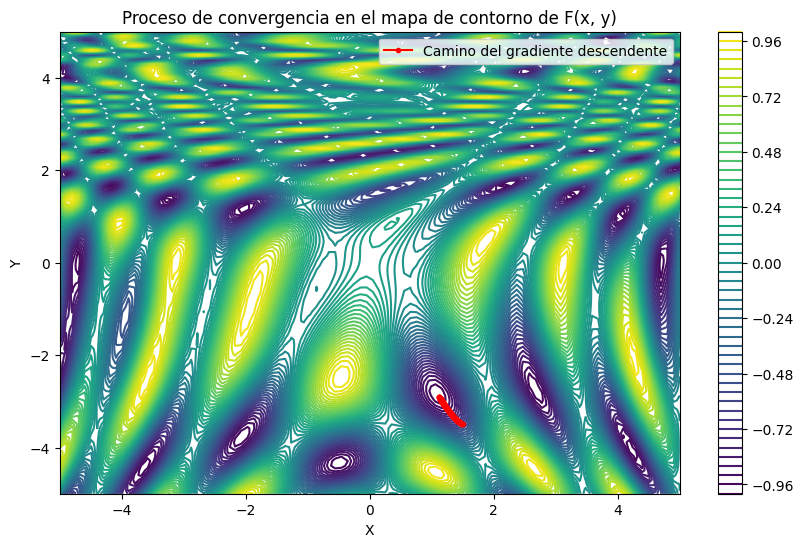

In [14]:
# Graficar el proceso de convergencia en el mapa de contorno
plt.figure(figsize=(10, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Proceso de convergencia en el mapa de contorno de F(x, y)')

# Mostrar el camino del gradiente
history_x = [point[0] for point in history]
history_y = [point[1] for point in history]
plt.plot(history_x, history_y, 'r.-', label="Camino del gradiente descendente")
plt.legend()
plt.show()

# Modelo de *machine learning*: Solución general

8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.

Solución:

Primero se definen los datos:

In [15]:
# Datos de entrada
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

Después la función lineal con la función de costo:

In [16]:
def h(X, theta_0, theta_1):
    return theta_0 + theta_1 * X

def cost_function(theta_0, theta_1, X, y):
    m = len(y)
    return (1 / (2 * m)) * np.sum((h(X, theta_0, theta_1) - y) ** 2)

Y ahora se vuelve necesario hallar las derivadas parciales de la función de costo respecto a los parámetros $\theta_0$ y $\theta_1$. Empezamos con la derivada parcial de $J$ respecto a $\theta_0$:

$$
\frac{\partial J}{\partial \theta_0} = \frac{\partial}{\partial \theta_0} \left( \frac{1}{2m} \sum_{i=1}^m \left( (\theta_0 + \theta_1 X^{(i)}) - y^{(i)} \right)^2 \right)
$$

Aplicando la regla de la cadena:

$$
\frac{\partial J}{\partial \theta_0} = \frac{1}{2m} \sum_{i=1}^m 2 \left( (\theta_0 + \theta_1 X^{(i)}) - y^{(i)} \right) \cdot 1
$$

Y simplificando:

$$
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( (\theta_0 + \theta_1 X^{(i)}) - y^{(i)} \right) = \frac{1}{m} \sum_{i=1}^m \left( h(X^{(i)}) - y^{(i)} \right)
$$

Continuamos ahora con la derivada parcial de $J$ respecto a $\theta_1$:


$$
\frac{\partial J}{\partial \theta_1} = \frac{\partial}{\partial \theta_1} \left( \frac{1}{2m} \sum_{i=1}^m \left( (\theta_0 + \theta_1 X^{(i)}) - y^{(i)} \right)^2 \right)
$$

Nuevamente, aplicamos la regla de la cadena, esta vez multiplicando por $X^{(i)}$, que es la derivada de la expresión interna con respecto a $\theta_1$:

$$
\frac{\partial J}{\partial \theta_1} = \frac{1}{2m} \sum_{i=1}^m 2 \left( (\theta_0 + \theta_1 X^{(i)}) - y^{(i)} \right) \cdot X^{(i)}
$$

Simplificando, obtenemos:

$$
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^m \left( (\theta_0 + \theta_1 X^{(i)}) - y^{(i)} \right) X^{(i)} = \frac{1}{m} \sum_{i=1}^m \left( h(X^{(i)}) - y^{(i)} \right) X^{(i)}
$$

Y ya teniendo la fórmula de las derivadas se implementa todo el cálculo de gradiente descendiente, desde el establecimiento de los valores iniciales de $\theta_0$ y $\theta_1$.

In [17]:
# Gradiente descendente para optimizar theta_0 y theta_1
def gradient_descent(X, y, alpha, epsilon=1e-6, max_iterations=1000):
    m = len(y)
    theta_0, theta_1 = 0, 0  # Valores iniciales de theta_0 y theta_1
    cost_history = []
    
    for iteration in range(max_iterations):
        # Calcular las derivadas parciales
        gradient_theta_0 = (1 / m) * np.sum(h(X, theta_0, theta_1) - y)
        gradient_theta_1 = (1 / m) * np.sum((h(X, theta_0, theta_1) - y) * X)
        
        # Actualizar theta_0 y theta_1
        theta_0 -= alpha * gradient_theta_0
        theta_1 -= alpha * gradient_theta_1
        
        # Calcular el coste actual y almacenarlo
        current_cost = cost_function(theta_0, theta_1, X, y)
        cost_history.append(current_cost)
        
        # Verificar el criterio de parada
        if iteration > 0 and abs(cost_history[-2] - current_cost) < epsilon:
            print(f"Convergencia alcanzada en {iteration} iteraciones.")
            break
    
    return theta_0, theta_1, cost_history

Y ahora se ejecuta todo el algoritmo:

In [18]:
alpha = 0.1 
theta_0, theta_1, cost_history = gradient_descent(X, y, alpha)

print(f"Valores optimizados: θ0 = {theta_0}, θ1 = {theta_1}")
print(f"Costo final: {cost_history[-1]}")

Convergencia alcanzada en 74 iteraciones.
Valores optimizados: θ0 = 0.23202489468260348, θ1 = 0.1590893635201846
Costo final: 8.976093321296381e-05


Por último se hacen unas gráficas para observar los resultados:

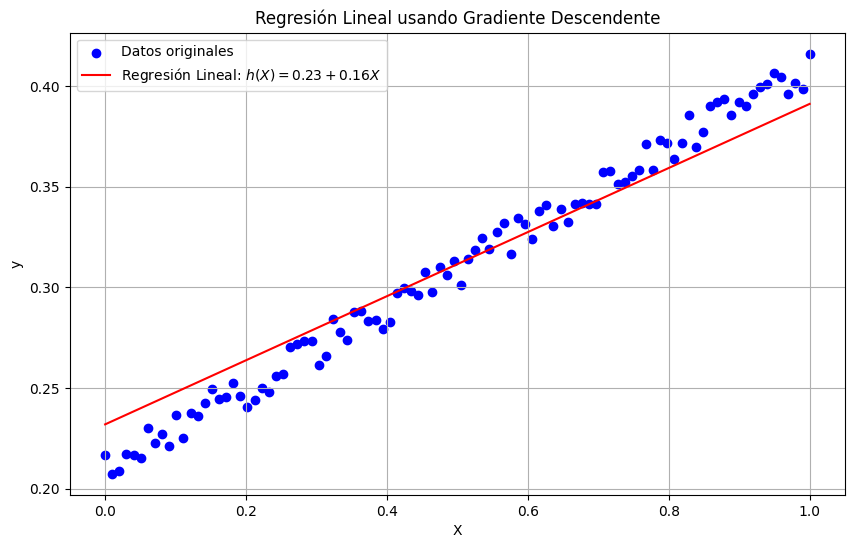

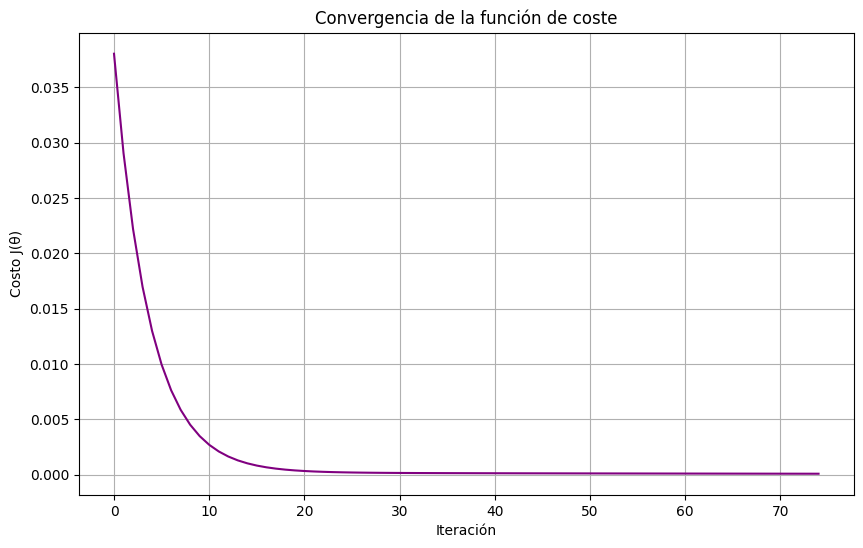

In [19]:
# Graficar los datos originales y la recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos originales')
plt.plot(X, h(X, theta_0, theta_1), color='red', label=f'Regresión Lineal: $h(X) = {theta_0:.2f} + {theta_1:.2f}X$')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal usando Gradiente Descendente')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el historial de la función de coste
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, color='purple')
plt.xlabel('Iteración')
plt.ylabel('Costo J(θ)')
plt.title('Convergencia de la función de coste')
plt.grid(True)
plt.show()

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

In [20]:
from sklearn.linear_model import LinearRegression

# Datos de entrada
X = np.linspace(0, 1, 100).reshape(-1,1)
y = 0.2 + 0.2 * X.flatten() + 0.02 * np.random.random(100)

# Ajuste con sklearn LinearRegression
model = LinearRegression()
model.fit(X, y)
theta_0_sklearn = model.intercept_
theta_1_sklearn = model.coef_[0]

# Resultados
print(f"Resultados del gradiente descendente manual:")
print(f"θ0 = {theta_0}, θ1 = {theta_1}\n")

print(f"Resultados de sklearn LinearRegression:")
print(f"θ0 = {theta_0_sklearn}, θ1 = {theta_1_sklearn}\n")

Resultados del gradiente descendente manual:
θ0 = 0.23202489468260348, θ1 = 0.1590893635201846

Resultados de sklearn LinearRegression:
θ0 = 0.20907413233969663, θ1 = 0.20228839319198377



Y por último se grafican las dos regresiones para comprobar visualmente cuál es mejor:

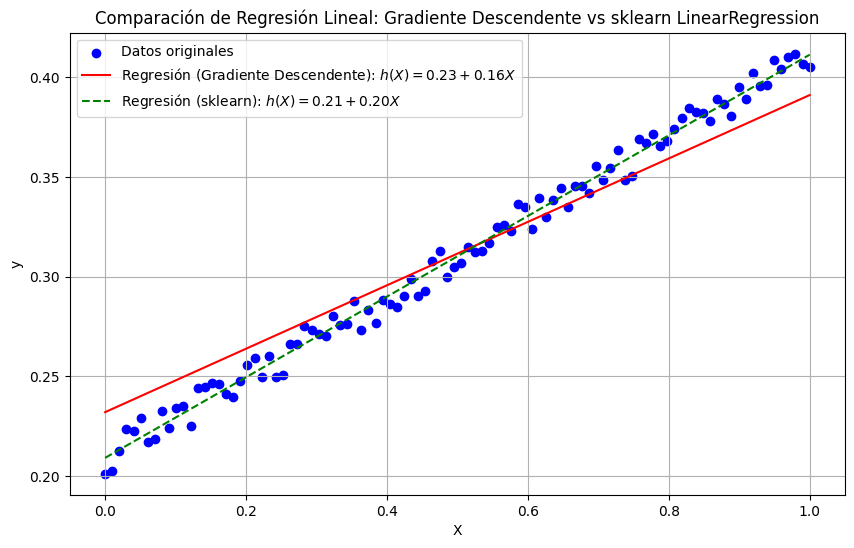

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos originales')

plt.plot(X, h(X.flatten(), theta_0, theta_1), color='red', label=f'Regresión (Gradiente Descendente): $h(X) = {theta_0:.2f} + {theta_1:.2f}X$')

plt.plot(X, model.predict(X), color='green', linestyle='--', label=f'Regresión (sklearn): $h(X) = {theta_0_sklearn:.2f} + {theta_1_sklearn:.2f}X$')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparación de Regresión Lineal: Gradiente Descendente vs sklearn LinearRegression')
plt.legend()
plt.grid(True)
plt.show()

La de scikit-learn es mejor y se ajusta un poco más adecuadamente a los datos.